In [1]:
!pip install geopandas --upgrade pip
!pip install geopy --upgrade pip

Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/83/c5/3cf9cdc39a6f2552922f79915f36b45a95b71fd343cfc51170a5b6ddb6e8/geopandas-0.7.0-py2.py3-none-any.whl
Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/54/2e/df11ea7e23e7e761d484ed3740285a34e38548cf2bad2bed3dd5768ec8b9/pip-20.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/71/8f53bdbcbc67c912b888b40def255767e475402e9df64050019149b1a943/pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl
Requirement already up-to-date: fiona in /srv/app/venv/lib/python3.6/site-packages (from geopandas)
Requirement already up-to-date: pyproj>=2.2.0 in /srv/app/venv/lib/python3.6/site-packages (from geopandas)
  Using cached https://files.pythonhosted.org/packages/20/fa/c96d3461fda99ed8e82ff0b219ac2c8384694b4e640a611a1a8390ecd415/Shapely-1.7.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.or

In [2]:
import geopy
import geopandas
import pandas as pd
!pip install osmnx

  Using cached osmnx-0.12.1-py2.py3-none-any.whl (78 kB)
  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
Processing /home/jovyan/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e/Rtree-0.9.4-cp36-none-any.whl
ERROR: spacy 1.9.0 has requirement pip<10.0.0,>=9.0.0, but you'll have pip 20.1 which is incompatible.
ERROR: okpy 1.12.5 has requirement requests==2.12.4, but you'll have requests 2.23.0 which is incompatible.
ERROR: allensdk 0.16.0 has requirement scikit-image>=0.14.0, but you'll have scikit-image 0.13.1 which is incompatible.
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:
      Successfully uninstalled matplotlib-3.1.0
  Attempting uninstall: requests
    Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0
  Attempting u

# Geocoding the addresses for our facilities

In [3]:
locator = geopy.geocoders.Nominatim(user_agent='myGeocoder')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ryglaws/255_Final/master/Facilities_Folium_4.16.csv')
df.head()

facility_name facility_type                                    location  \
0           CVS    Drug Store      731 Market St, San Francisco, CA 94103   
1           CVS    Drug Store  351 California St, San Francisco, CA 94104   
2           CVS    Drug Store      400 Sutter St, San Francisco, CA 94108   
3           CVS    Drug Store    3600 Geary Blvd, San Francisco, CA 94118   
4           CVS    Drug Store     701 Portola Dr, San Francisco, CA 94127   

     zip          contact  
0  94103  +1 415-243-0273  
1  94104  +1 415-243-0273  
2  94108  +1 415-398-2175  
3  94118  +1 415-668-6083  
4  94127  +1 415-504-6043

In [5]:
from geopy.extra.rate_limiter import RateLimiter

In [6]:
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['geocode'] = df['location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['geocode'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1300 Bush St, San Francisco, CA 94109',), **{}).
Traceback (most recent call last):
  File "/srv/app/venv/lib/python3.6/site-packages/geopy/geocoders/base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/usr/lib/python3.6/urllib/request.py", line 544, in _open
    '_open', req)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 1368, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/usr/lib/python3.6/urllib/request.py", line 1328, in do_open
    r = h.getresponse()
  File "/usr/lib/python3.6/http/client.py", line 1356, in getresponse
    response.begin()
  File "/usr/lib/python3.6/http/client.py", line 307, in begin
    version, status, reaso

RateLimiter caught an error, retrying (0/2 tries). Called with (*('3400 Cesar Chavez, San Francisco, CA 94110',), **{}).
Traceback (most recent call last):
  File "/srv/app/venv/lib/python3.6/site-packages/geopy/geocoders/base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/usr/lib/python3.6/urllib/request.py", line 544, in _open
    '_open', req)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 1368, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/usr/lib/python3.6/urllib/request.py", line 1328, in do_open
    r = h.getresponse()
  File "/usr/lib/python3.6/http/client.py", line 1356, in getresponse
    response.begin()
  File "/usr/lib/python3.6/http/client.py", line 307, in begin
    version, status, 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('200 W Portal Ave, San Francisco, CA 94127',), **{}).
Traceback (most recent call last):
  File "/srv/app/venv/lib/python3.6/site-packages/geopy/geocoders/base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/usr/lib/python3.6/urllib/request.py", line 544, in _open
    '_open', req)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 1368, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/usr/lib/python3.6/urllib/request.py", line 1328, in do_open
    r = h.getresponse()
  File "/usr/lib/python3.6/http/client.py", line 1356, in getresponse
    response.begin()
  File "/usr/lib/python3.6/http/client.py", line 307, in begin
    version, status, r

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1301 Pierce St, San Francisco, CA 94115',), **{}).
Traceback (most recent call last):
  File "/srv/app/venv/lib/python3.6/site-packages/geopy/geocoders/base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/usr/lib/python3.6/urllib/request.py", line 544, in _open
    '_open', req)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 1368, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/usr/lib/python3.6/urllib/request.py", line 1328, in do_open
    r = h.getresponse()
  File "/usr/lib/python3.6/http/client.py", line 1356, in getresponse
    response.begin()
  File "/usr/lib/python3.6/http/client.py", line 307, in begin
    version, status, rea

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2919 Mission St, San Francisco, CA 94110',), **{}).
Traceback (most recent call last):
  File "/srv/app/venv/lib/python3.6/site-packages/geopy/geocoders/base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/usr/lib/python3.6/urllib/request.py", line 544, in _open
    '_open', req)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 1368, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/usr/lib/python3.6/urllib/request.py", line 1328, in do_open
    r = h.getresponse()
  File "/usr/lib/python3.6/http/client.py", line 1356, in getresponse
    response.begin()
  File "/usr/lib/python3.6/http/client.py", line 307, in begin
    version, status, re

In [7]:
df.isnull()

facility_name  facility_type  location    zip  contact  geocode  point  \
0            False          False     False  False    False    False  False   
1            False          False     False  False    False    False  False   
2            False          False     False  False    False    False  False   
3            False          False     False  False    False    False  False   
4            False          False     False  False    False    False  False   
..             ...            ...       ...    ...      ...      ...    ...   
158          False          False     False  False    False    False  False   
159          False          False     False  False    False    False  False   
160          False          False     False  False    False     True   True   
161          False          False     False  False    False    False  False   
162          False          False     False  False    False    False  False   

     latitude  longitude  altitude  
0       False      False     False  
1       False      False     False  
2       False      False     False  
3       False      False     False  
4       False      False     False  
..        ...        ...       ...  
158     False      False     False  
159     False      False     False  
160      True       True      True  
161     False      False     False  
162     False      False     False  

[163 rows x 10 columns]

In [8]:
# Drop rows with NaN or missing value in all columns
facilities = df.dropna()


In [9]:
facilities.isnull()

facility_name  facility_type  location    zip  contact  geocode  point  \
0            False          False     False  False    False    False  False   
1            False          False     False  False    False    False  False   
2            False          False     False  False    False    False  False   
3            False          False     False  False    False    False  False   
4            False          False     False  False    False    False  False   
..             ...            ...       ...    ...      ...      ...    ...   
155          False          False     False  False    False    False  False   
158          False          False     False  False    False    False  False   
159          False          False     False  False    False    False  False   
161          False          False     False  False    False    False  False   
162          False          False     False  False    False    False  False   

     latitude  longitude  altitude  
0       False      False     False  
1       False      False     False  
2       False      False     False  
3       False      False     False  
4       False      False     False  
..        ...        ...       ...  
155     False      False     False  
158     False      False     False  
159     False      False     False  
161     False      False     False  
162     False      False     False  

[143 rows x 10 columns]

In [10]:
facilities.head(140)

facility_name                facility_type  \
0                                           CVS                   Drug Store   
1                                           CVS                   Drug Store   
2                                           CVS                   Drug Store   
3                                           CVS                   Drug Store   
4                                           CVS                   Drug Store   
..                                          ...                          ...   
149  California Pacific Med Ctr-california East  General Acute Care Hospital   
150  Instituto Familiar De La Raza - Outpatient             Community Clinic   
154   California Pacific Med Ctr-pacific Campus  General Acute Care Hospital   
155                         Ucsf Medical Center  General Acute Care Hospital   
158       North East Medical Services - Noriega             Community Clinic   

                                        location    zip          contact  \
0         731 Market St, San Francisco, CA 94103  94103  +1 415-243-0273   
1     351 California St, San Francisco, CA 94104  94104  +1 415-243-0273   
2         400 Sutter St, San Francisco, CA 94108  94108  +1 415-398-2175   
3       3600 Geary Blvd, San Francisco, CA 94118  94118  +1 415-668-6083   
4        701 Portola Dr, San Francisco, CA 94127  94127  +1 415-504-6043   
..                                           ...    ...              ...   
149  3773 Sacramento St, San Francisco, CA 94118  94118          Unknown   
150     2919 Mission St, San Francisco, CA 94110  94110          Unknown   
154    2333 Buchanan St, San Francisco, CA 94115  94115          Unknown   
155   505 Parnassus Ave, San Francisco, CA 94143  94143          Unknown   
158     1450 Noriega St, San Francisco, CA 94122  94122          Unknown   

                                               geocode  \
0    (CVS Pharmacy, Market Street, Union Square, Sa...   
1    (351, California Street, Financial District, S...   
2    (400, Sutter Street, Union Square, San Francis...   
3    (3600, Geary Boulevard, Jordan Park, San Franc...   
4    (CVS Pharmacy, Portola Drive, Forest Hill, San...   
..                                                 ...   
149  (Medical Center Parking, Sacramento Street, Pr...   
150  (Instituto Familiar de la Raza, Mission Street...   
154  (California Pacific Medical Center, Buchanan S...   
155  (University of California Medical Center, Parn...   
158  (Bank of America, Noriega Street, Inner Sunset...   

                                              point   latitude   longitude  \
0                   (37.7868371, -122.4041386, 0.0)  37.786837 -122.404139   
1            (37.7928462, -122.40090691922816, 0.0)  37.792846 -122.400907   
2                     (37.789496, -122.407127, 0.0)  37.789496 -122.407127   
3     (37.78114096774194, -122.45804891935485, 0.0)  37.781141 -122.458049   
4    (37.744190950000004, -122.45325431912494, 0.0)  37.744191 -122.453254   
..                                              ...        ...         ...   
149                  (37.786983, -122.4550186, 0.0)  37.786983 -122.455019   
150                 (37.7502966, -122.4181101, 0.0)  37.750297 -122.418110   
154         (37.79050015, -122.43230860491363, 0.0)  37.790500 -122.432309   
155            (37.76307, -122.45740267680621, 0.0)  37.763070 -122.457403   
158                 (37.7542482, -122.4795778, 0.0)  37.754248 -122.479578   

     altitude  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
..        ...  
149       0.0  
150       0.0  
154       0.0  
155       0.0  
158       0.0  

[140 rows x 10 columns]

In [11]:
# Isolate the drugstores

drug_store = facilities.loc[facilities.facility_type=='Drug Store']
drug_store.head(140)

facility_name facility_type                                    location  \
0            CVS    Drug Store      731 Market St, San Francisco, CA 94103   
1            CVS    Drug Store  351 California St, San Francisco, CA 94104   
2            CVS    Drug Store      400 Sutter St, San Francisco, CA 94108   
3            CVS    Drug Store    3600 Geary Blvd, San Francisco, CA 94118   
4            CVS    Drug Store     701 Portola Dr, San Francisco, CA 94127   
..           ...           ...                                         ...   
83     Walgreens    Drug Store     2050 Irving St, San Francisco, CA 94122   
84     Walgreens    Drug Store      825 Market St, San Francisco, CA 94103   
85     Walgreens    Drug Store        33 Drumm St, San Francisco, CA 94111   
86     Walgreens    Drug Store     2262 Market St, San Francisco, CA 94114   
87     Walgreens    Drug Store      498 Castro St, San Francisco, CA 94114   

      zip          contact                                            geocode  \
0   94103  +1 415-243-0273  (CVS Pharmacy, Market Street, Union Square, Sa...   
1   94104  +1 415-243-0273  (351, California Street, Financial District, S...   
2   94108  +1 415-398-2175  (400, Sutter Street, Union Square, San Francis...   
3   94118  +1 415-668-6083  (3600, Geary Boulevard, Jordan Park, San Franc...   
4   94127  +1 415-504-6043  (CVS Pharmacy, Portola Drive, Forest Hill, San...   
..    ...              ...                                                ...   
83  94122  +1 415 664-4215  (Walgreens, Irving Street, Sunset District, Sa...   
84  94103  +1 415 543-9502  (Market Street, Tenderloin, San Francisco, San...   
85  94111  +1 415 989-6116  (Walgreens, Drumm Street, Financial District, ...   
86  94114  +1 415 255-0101  (2262, Market Street, Duboce Triangle, San Fra...   
87  94114  +1 415 861-3136  (Walgreens, Castro Street, Castro District, Sa...   

                                             point   latitude   longitude  \
0                  (37.7868371, -122.4041386, 0.0)  37.786837 -122.404139   
1           (37.7928462, -122.40090691922816, 0.0)  37.792846 -122.400907   
2                    (37.789496, -122.407127, 0.0)  37.789496 -122.407127   
3    (37.78114096774194, -122.45804891935485, 0.0)  37.781141 -122.458049   
4   (37.744190950000004, -122.45325431912494, 0.0)  37.744191 -122.453254   
..                                             ...        ...         ...   
83          (37.7636358, -122.48000391253493, 0.0)  37.763636 -122.480004   
84                 (37.7813537, -122.4113456, 0.0)  37.781354 -122.411346   
85                 (37.7941031, -122.3966895, 0.0)  37.794103 -122.396689   
86  (37.764965430218204, -122.43240187030558, 0.0)  37.764965 -122.432402   
87                 (37.7610102, -122.4352043, 0.0)  37.761010 -122.435204   

    altitude  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
83       0.0  
84       0.0  
85       0.0  
86       0.0  
87       0.0  

[83 rows x 10 columns]

In [12]:
# Isolate the healthcare facilities

health_care=facilities.loc[facilities.facility_type!='Drug Store']
health_care.head(140)

facility_name  \
88            California Pacific Med Ctr-davies Campus   
89        On Lok Senior Health Services-mission Center   
92                          Special Programs For Youth   
93   Mission Neighborhood Health Ctr.-excelsior Clinic   
95     Laguna Honda Hospital And Rehabilitation Center   
97                            Baart Turk Street Clinic   
98                           Tom Waddell Health Center   
99                 North East Medical Services-taraval   
100                      On Lok Senior Health Services   
101                    Housing And Urban Health Clinic   
102                         Potrero Hill Health Center   
103                      South Of Market Health Center   
104                       Family Health Center At Sfgh   
105                                 Institute On Aging   
106                              Women's Health Center   
107                 Lyon-martin Womens Health Services   
108                       Castro-mission Health Center   
109                                   Chinese Hospital   
110                          San Francisco Free Clinic   
111     North East Medical Services - San Bruno Avenue   
113                      Native American Health Center   
115                       Larkin Street Medical Clinic   
116                   Children's Health Center At Sfgh   
117                     Planned Parenthood Golden Gate   
118                   3rd Street Youth Center & Clinic   
119                     General Medical Clinic At Sfgh   
120               Mission Neighborhood Resource Center   
121                              Glide Health Services   
122                                Curry Senior Center   
123                       Lifeways Pace At The Coronet   
124              Haight Ashbury Integrated Care Center   
125                          San Francisco City Clinic   
126              Ahf Healthcare Center - San Francisco   
127                  Ucsf Medical Center At Mount Zion   
128                 Silver Avenue Family Health Center   
129                 Haight Ashbury Free Medical Clinic   
130                           Ocean Park Health Center   
131       Chinese Hospital's Excelsior Health Services   
132                  Chinese Community Health Services   
133          North East Medical Services-leland Avenue   
134           Asian & Pacific Islander Wellness Center   
136                     San Francisco General Hospital   
137                            Southeast Health Center   
138                 Adult Immunization & Travel Clinic   
139                        North East Medical Services   
140            Planned Parenthood San Francisco Center   
141                    Kaiser Fnd Hosp - San Francisco   
142              Woman's Community Clinic/tides Center   
143             On Lok Senior Health Services - Powell   
145                      St. Francis Memorial Hospital   
146                            Chinatown Health Center   
147           St. Mary's Medical Center, San Francisco   
149         California Pacific Med Ctr-california East   
150         Instituto Familiar De La Raza - Outpatient   
154          California Pacific Med Ctr-pacific Campus   
155                                Ucsf Medical Center   
158              North East Medical Services - Noriega   
159            On Lok Senior Health Services - Bush St   
161                               Richmond Maxi-center   
162                                 Cole Street Clinic   

                   facility_type  \
88   General Acute Care Hospital   
89              Community Clinic   
92      Community Health Network   
93              Community Clinic   
95   General Acute Care Hospital   
97              Community Clinic   
98      Community Health Network   
99      Community Health Network   
100             Community Clinic   
101     Community Health Network   
102     Community Health Network   
103             Community Clinic   
104     Community Health Network  

In [13]:
! pip install folium
import folium

In [14]:
map1 = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)
facilities.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]], 
popup=(row["facility_name"])).add_to(map1), axis=1)
map1


#folium.Marker(
   # location=[45.3288, -121.6625],
   # popup='Mt. Hood Meadows',
    #icon=folium.Icon(icon='cloud')
#).add_to(m)

#folium.Marker(
 #   location=[45.3311, -121.7113],
  #  popup='Timberline Lodge',
   # icon=folium.Icon(color='green')
#).add_to(m)

#folium.Marker(
 #   location=[45.3300, -121.6823],
  #  popup='Some Other Location',
   # icon=folium.Icon(color='red', icon='info-sign')
#).add_to(m)


#m

In [15]:

from folium.plugins import FastMarkerCluster

folium_map = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)

FastMarkerCluster(data=list(zip(facilities['latitude'].values, facilities['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

# Trying to sort Facilities by zip code

In [16]:
import numpy as np
# Set zipcode type to string (folium)
facilities['zip'] = facilities['zip'].astype('str')
# get the mean value across all data points
zipcode_data = facilities.groupby('zip').aggregate(np.mean)
zipcode_data.reset_index(inplace = True)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# count number of faclities grouped by zipcode
facilities['count'] = 1
temp = facilities.groupby('zip').sum()
temp.reset_index(inplace = True)
temp = temp[['zip', 'count']]
zipcode_data = pd.merge(zipcode_data, temp, on='zip')
# drop count from org dataset
facilities.drop(['count'], axis = 1, inplace = True)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/app/venv/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
temp.head(55)

zip  count
0   94102     16
1   94103     13
2   94104      2
3   94105      6
4   94107      2
5   94108      4
6   94109     10
7    9411      1
8   94110     13
9   94111      2
10  94112      6
11  94114      8
12  94115      5
13  94116      5
14  94117      6
15  94118     11
16  94121      3
17  94122      4
18  94123      2
19  94124      3
20  94127      3
21  94131      1
22  94132      2
23  94133     10
24  94134      4
25  94143      1

In [19]:
temp.dtypes

zip      object
count     int64
dtype: object

# Add the Bay Area Zip Codes JSON

In [20]:
#Bring on the Json

import json
from folium import plugins
with open('BayAreaZIPCodes.geojson') as Json:
    data = json.load(Json)
zipson = data

In [21]:
print(zipson)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'area': '12313263537', 'zip': '94558', 'state': 'CA', 'po_name': 'NAPA', 'length': '995176.225313'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-122.10329200180091, 38.51328299864645], [-122.10348400246679, 38.51190700043408], [-122.1057250009471, 38.4941710006957], [-122.12948200350543, 38.43106199833337], [-122.08588100316003, 38.37941099927851], [-122.12065500374321, 38.3638390000353], [-122.1329510033434, 38.36384000062828], [-122.13986300299891, 38.3634550001827], [-122.14084500330095, 38.36336599999756], [-122.13992300243159, 38.3287629990724], [-122.13378500353839, 38.315619998782495], [-122.17277600109792, 38.31586599944193], [-122.19123500062744, 38.315633000224956], [-122.19270600284987, 38.31566399946309], [-122.19317900290548, 38.315623998935685], [-122.19422700119095, 38.31564200044592], [-122.19771600244407, 38.31534199861556], [-122.19797700078438, 38.314207999551414], [-122.197481

In [22]:
# remove ZIP codes not in geo data
geozips = []
for i in range(len(zipson['features'])):
    if zipson['features'][i]['properties']['zip'] in list(zipcode_data['zip'].unique()):
        geozips.append(zipson['features'][i])
# creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips
# save uodated JSON object
open("cleaned_geodata.json", "w").write(json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': ')))

345667

In [23]:
zipcode_data.head()

zip   latitude   longitude  altitude  count
0  94102  37.782967 -122.414337       0.0     16
1  94103  37.778454 -122.411178       0.0     13
2  94104  37.792601 -122.401686       0.0      2
3  94105  37.789845 -122.397238       0.0      6
4  94107  37.765697 -122.397156       0.0      2

# Map facilites by zip code

In [24]:
from folium.plugins import MarkerCluster
    # read updated geo data
sf_geo = "cleaned_geodata.json"

    # Initialize Folium Map with Seattle latitude and longitude
    #m = folium.Map(location=[37.764,-122.4194], zoom_start=12,
                   #detect_retina=True, control_scale=False)
    
choromap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
choromap.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=zipcode_data,
    # col: feature of interest
    columns=['zip', 'count'],
    key_on='feature.properties.zip',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Facilities by Zipcode')

    #folium.LayerControl().add_to(choromap)
    
    #Add marker clusters
FastMarkerCluster(data=list(zip(facilities['latitude'].values, facilities['longitude'].values))).add_to(choromap)
folium.LayerControl().add_to(choromap)
 
# now, all the markers should be directed to this objects as follows: folium.Marker(...).add_to(marker_cluster)

    # Save map based on feature of interest
    #m.save(col + '.html')

    #return m
choromap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Now that we did that, let's make the same thing happen for drug stores (origins) and healthcare centers (destinations)

In [25]:
import numpy as np

# Set zipcode type to string (folium)
drug_store['zip'] = drug_store['zip'].astype('str')
# get the mean value across all data points
zipcode_data2 = drug_store.groupby('zip').aggregate(np.mean)
zipcode_data2.reset_index(inplace = True)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
# count number of drug stores grouped by zipcode
drug_store['count'] = 1
temp2 = drug_store.groupby('zip').sum()
temp2.reset_index(inplace = True)
temp2 = temp2[['zip', 'count']]
zipcode_data2 = pd.merge(zipcode_data2, temp2, on='zip')
# drop count from org dataset
drug_store.drop(['count'], axis = 1, inplace = True)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/app/venv/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
# Map of drug stores

choromap2 = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
choromap2.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=zipcode_data2,
    # col: feature of interest
    columns=['zip', 'count'],
    key_on='feature.properties.zip',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Drug Stores by Zipcode')# Can we set the polygons to zip codes?

cluster_map = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)

FastMarkerCluster(data=list(zip(drug_store['latitude'].values, drug_store['longitude'].values))).add_to(choromap2)
folium.LayerControl().add_to(choromap2)

choromap2

In [28]:
import numpy as np

# Set zipcode type to string (folium)
health_care['zip'] = health_care['zip'].astype('str')
# get the mean value across all data points
zipcode_data3 = health_care.groupby('zip').aggregate(np.mean)
zipcode_data3.reset_index(inplace = True)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
# count number of health centers grouped by zipcode
health_care['count'] = 1
temp3 = health_care.groupby('zip').sum()
temp3.reset_index(inplace = True)
temp3 = temp3[['zip', 'count']]
zipcode_data3 = pd.merge(zipcode_data3, temp3, on='zip')
# drop count from org dataset
health_care.drop(['count'], axis = 1, inplace = True)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#Map of Health Centers

choromap3 = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
choromap3.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=zipcode_data3,
    # col: feature of interest
    columns=['zip', 'count'],
    key_on='feature.properties.zip',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Healthcare Facilities by Zipcode')# Can we set the polygons to zip codes?

cluster_map = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)

FastMarkerCluster(data=list(zip(health_care['latitude'].values, health_care['longitude'].values))).add_to(choromap3)
folium.LayerControl().add_to(choromap3)

choromap3

# Mapping the drug stores and health centers on 1 map as separate facility types

In [31]:
%%capture
!pip install plotly --upgrade

In [32]:
import plotly
plotly.__version__

'4.7.0'

In [33]:
import plotly.express as px

In [34]:
#facilities.to_csv('4-16_facilities.csv')

In [35]:
#drug_store.to_csv('4-16_drugstore.csv')

In [36]:
#health_care.to_csv('4-16_healthcare.csv')

In [37]:
#zipcode_data2.to_csv('4-23_drugstore_count.csv')

In [38]:
#zipcode_data3.to_csv('4-23_healthcare_count.csv')

In [39]:
# First try with a simple popup

map3 = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)

tooltip = 'Click me!'
    
health_care.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=(row['facility_name'],
           row['location']),
    icon=folium.Icon(color='red'),
    tooltip=tooltip
).add_to(map3), axis=1)

drug_store.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=(row['facility_name'],  
           row['location']),
    icon=folium.Icon(color='green'),
    tooltip=tooltip
).add_to(map3), axis=1)

from folium.plugins import FloatImage
image_file = 'https://raw.githubusercontent.com/ryglaws/255_Final/master/Legend2.png'

FloatImage(image_file, bottom=2.5, left=85).add_to(map3)
map3

In [40]:
map3.save(outfile='facilitiesmap.html')

In [41]:
# Creating a unique html popup for each facility type

import branca

def drugstore_html(row):
    i = row
    
    Facility_Name = drug_store['facility_name'].iloc[i]                             
    Address = drug_store['location'].iloc[i]                           
    Phone_Number = drug_store['contact'].iloc[i]
    Lat = drug_store['latitude'].iloc[i]
    Long = drug_store['longitude'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

</head>
    <table style="height: 120px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Facility Name</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Facility_Name) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Address</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Address) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Phone Number</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Phone_Number) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Latitude</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Lat) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Longitude</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Long) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [42]:

#Second html popup

def healthcare_html(row):
    i = row
    
    Facility_Name = health_care['facility_name'].iloc[i]                             
    Address = health_care['location'].iloc[i]                           
    Phone_Number = health_care['contact'].iloc[i]
    Lat = health_care['latitude'].iloc[i]
    Long = health_care['longitude'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>
</head>
    <table style="height: 120px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Facility Name</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Facility_Name) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Address</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Address) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Phone Number</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Phone_Number) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Latitude</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Lat) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Longitude</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Long) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [43]:
#Try this but separate by facility type

fancymap = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)

for i in range(0,len(drug_store)):
                 html = drugstore_html(i)
                 tooltip = 'Click me!'
                 iframe = branca.element.IFrame(html=html,width=400,height=300)
                 popup = folium.Popup(iframe,parse_html=True)
                 
                 folium.Marker([drug_store['latitude'].iloc[i],drug_store['longitude'].iloc[i]],
                               popup=popup, icon=folium.Icon(color='blue', icon='info-sign'), tooltip=tooltip
                              ).add_to(fancymap)

for i in range(0,len(health_care)):
                 html = healthcare_html(i)
                 tooltip = 'Click me!'
                 iframe = branca.element.IFrame(html=html,width=400,height=300)
                 popup = folium.Popup(iframe,parse_html=True)
                 
                 folium.Marker([health_care['latitude'].iloc[i],health_care['longitude'].iloc[i]],
                               popup=popup, icon=folium.Icon(color='red', icon='info-sign'), tooltip=tooltip
                              ).add_to(fancymap)

    
from folium.plugins import FloatImage
image_file = 'https://raw.githubusercontent.com/ryglaws/255_Final/master/Legend_Fancy.png'

FloatImage(image_file, bottom=2.5, left=89).add_to(fancymap)
fancymap


In [44]:
fancymap.save(outfile='fancymap.html')

# Create maps that show the density of facilities in each zip code

In [45]:
# Importing data on the square miles of each SF Zip Code: Calculated using population per sq. mile / population:
# link to original data: http://zipatlas.com/us/ca/san-francisco/zip-code-comparison/population-density.html
sq_miles = pd.read_csv('https://raw.githubusercontent.com/ryglaws/255_Final/master/Zip_SqMiles.csv')
sq_miles.head(27)

zip_code  sq_mileage
0      94102    0.648289
1      94103    1.342788
2      94104    0.081343
3      94105    0.348663
4      94107    2.437241
5      94108    0.258138
6      94109    1.210667
7      94110    2.381114
8      94111    0.475257
9      94112    3.308239
10     94114    1.366284
11     94115    1.123993
12     94116    2.583175
13     94117    1.390391
14     94118    1.764072
15     94121    2.949985
16     94122    3.182664
17     94123    1.009787
18     94124    5.002285
19     94127    1.880071
20     94129    2.335577
21     94130    0.901063
22     94131    2.134286
23     94132    4.061760
24     94133    0.668703
25     94134    2.393319

In [46]:
# Finding facility densities for drug stores and health centers

In [47]:
sq_miles['zip']=sq_miles['zip_code']

In [48]:
# Time to merge data the data on facilities per zip code with the square mileage data

zipcode_data=zipcode_data.astype(str)

In [49]:
sq_miles.dtypes

zip_code        int64
sq_mileage    float64
zip             int64
dtype: object

In [50]:
sq_miles=sq_miles.astype(str)

In [51]:
density_all = pd.merge(zipcode_data, sq_miles, on='zip', how='left')

In [52]:
density_all.drop(['zip_code'], axis = 1, inplace = True)

In [53]:
density_all.head()

zip            latitude            longitude altitude count   sq_mileage
0  94102   37.78296722227175  -122.41433660617955      0.0    16  0.648289193
1  94103   37.77845434905272  -122.41117783882338      0.0    13  1.342787766
2  94104          37.7926009  -122.40168564158472      0.0     2  0.081342897
3  94105  37.789844708333334  -122.39723789166665      0.0     6  0.348663457
4  94107   37.76569724166667  -122.39715576666667      0.0     2   2.43724118

In [54]:
# Creating a density colums

density_all['count'] = density_all['count'].astype(int)

In [55]:
density_all['sq_mileage'] = density_all['sq_mileage'].astype(float)

In [56]:
density_all['density'] = density_all['count']/density_all['sq_mileage']

In [57]:
density_all.head()

zip            latitude            longitude altitude  count  sq_mileage  \
0  94102   37.78296722227175  -122.41433660617955      0.0     16    0.648289   
1  94103   37.77845434905272  -122.41117783882338      0.0     13    1.342788   
2  94104          37.7926009  -122.40168564158472      0.0      2    0.081343   
3  94105  37.789844708333334  -122.39723789166665      0.0      6    0.348663   
4  94107   37.76569724166667  -122.39715576666667      0.0      2    2.437241   

     density  
0  24.680344  
1   9.681351  
2  24.587273  
3  17.208571  
4   0.820600

In [58]:
density_all.dtypes

zip            object
latitude       object
longitude      object
altitude       object
count           int64
sq_mileage    float64
density       float64
dtype: object

In [59]:
#density map

density_allmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
density_allmap.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=density_all,
    # col: feature of interest
    columns=['zip', 'density'],
    key_on='feature.properties.zip',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Facility Density (Facilities Per Square Mile) by Zipcode')# Can we set the polygons to zip codes?

cluster_map = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)

FastMarkerCluster(data=list(zip(facilities['latitude'].values, facilities['longitude'].values))).add_to(density_allmap)
folium.LayerControl().add_to(density_allmap)

density_allmap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [60]:
density_allmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
density_allmap.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=density_all,
    # col: feature of interest
    columns=['zip', 'density'],
    key_on='feature.properties.zip',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Facility Density (Facilities per Square Mile) by Zipcode')# Can we set the polygons to zip codes?

cluster_map = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)


density_allmap

In [61]:
drugstore_data=zipcode_data2

In [62]:
drugstore_data.head()

zip   latitude   longitude  altitude  count
0  94102  37.783455 -122.414354       0.0      9
1  94103  37.781033 -122.409894       0.0      8
2  94104  37.792601 -122.401686       0.0      2
3  94105  37.789845 -122.397238       0.0      6
4  94107  37.777372 -122.395481       0.0      1

In [63]:
drugstore_data=drugstore_data.astype(str)

In [64]:
drugstore_density = pd.merge(drugstore_data, sq_miles, on='zip', how='left')

In [65]:
drugstore_density.drop(['zip_code'], axis = 1, inplace = True)

In [66]:
drugstore_density.head()

zip            latitude            longitude altitude count   sq_mileage
0  94102   37.78345483745619  -122.41435409268193      0.0     9  0.648289193
1  94103   37.78103313149639  -122.40989360990478      0.0     8  1.342787766
2  94104          37.7926009  -122.40168564158472      0.0     2  0.081342897
3  94105  37.789844708333334  -122.39723789166665      0.0     6  0.348663457
4  94107  37.777371583333334  -122.39548133333334      0.0     1   2.43724118

In [67]:
drugstore_density['count']=drugstore_density['count'].astype(int)
drugstore_density['sq_mileage']=drugstore_density['sq_mileage'].astype(float)

In [68]:
drugstore_density['density'] = drugstore_density['count']/drugstore_density['sq_mileage']

In [69]:
#drug store density map

density_drugmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
density_drugmap.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=drugstore_density,
    # col: feature of interest
    columns=['zip', 'density'],
    key_on='feature.properties.zip',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Drug Store Density (Drug Stores Per Square Mile) by Zipcode')# Can we set the polygons to zip codes?

cluster_map = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)

FastMarkerCluster(data=list(zip(drug_store['latitude'].values, drug_store['longitude'].values))).add_to(density_drugmap)
folium.LayerControl().add_to(density_drugmap)

density_drugmap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [70]:
healthcare_data=zipcode_data3

In [71]:
healthcare_data.head()

zip   latitude   longitude  altitude  count
0  94102  37.782340 -122.414314       0.0      7
1  94103  37.774328 -122.413233       0.0      5
2  94107  37.754023 -122.398830       0.0      1
3  94108  37.791135 -122.405782       0.0      1
4  94109  37.787367 -122.418321       0.0      3

In [72]:
healthcare_data=healthcare_data.astype(str)

In [73]:
healthcare_density = pd.merge(healthcare_data, sq_miles, on='zip', how='left')

In [74]:
healthcare_density.drop(['zip_code'], axis = 1, inplace = True)

In [75]:
healthcare_density.head()

zip            latitude            longitude altitude count   sq_mileage
0  94102  37.782340288463196  -122.41431412353366      0.0     7  0.648289193
1  94103   37.77432829714285  -122.41323260509316      0.0     5  1.342787766
2  94107          37.7540229         -122.3988302      0.0     1   2.43724118
3  94108  37.791134666666665  -122.40578166666667      0.0     1  0.258137514
4  94109   37.78736748076342   -122.4183210927046      0.0     3  1.210667077

In [76]:
healthcare_density['count']=healthcare_density['count'].astype(int)
healthcare_density['sq_mileage']=healthcare_density['sq_mileage'].astype(float)

In [77]:
healthcare_density['density'] = healthcare_density['count']/healthcare_density['sq_mileage']

In [78]:
healthcare_density.head()

zip            latitude            longitude altitude  count  sq_mileage  \
0  94102  37.782340288463196  -122.41431412353366      0.0      7    0.648289   
1  94103   37.77432829714285  -122.41323260509316      0.0      5    1.342788   
2  94107          37.7540229         -122.3988302      0.0      1    2.437241   
3  94108  37.791134666666665  -122.40578166666667      0.0      1    0.258138   
4  94109   37.78736748076342   -122.4183210927046      0.0      3    1.210667   

     density  
0  10.797650  
1   3.723597  
2   0.410300  
3   3.873904  
4   2.477973

In [79]:
#Healthcare center density map

density_healthmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
density_healthmap.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=healthcare_density,
    # col: feature of interest
    columns=['zip', 'density'],
    key_on='feature.properties.zip',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Healthcare Center Density (Healthcare Centers Per Square Mile) by Zipcode')# Can we set the polygons to zip codes?

cluster_map = folium.Map(
    location=[37.764,-122.4194],
    tiles='cartodbpositron',
    zoom_start=12,
)

FastMarkerCluster(data=list(zip(health_care['latitude'].values, health_care['longitude'].values))).add_to(density_healthmap)
folium.LayerControl().add_to(density_healthmap)

density_healthmap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



# Let's bring in the opioid incidents by zipcode data

In [80]:
# import opioid death data
opdeath18_data = pd.read_csv("https://www.dropbox.com/s/iblpnv70nhsyrok/Death_SanFrancisco_AnyOpioid_2018.csv?dl=1")
    
opdeath18_data.rename(columns = {'San Francisco Deaths - 2018' : 'Zip Code',
                            'Unnamed: 1': 'Death Rates', 
                             'Unnamed: 2': 'Death 95% LCL', 
                             'Unnamed: 3' : 'Death 95% UCL'}, inplace=True)

In [81]:
#cut out the top two rows bc they are metadata
opdeath18cln = opdeath18_data.drop(opdeath18_data.index[[0,1,29,30,31,32]])

In [82]:
#Import the opioid ED Visit 2018 data

oped18_data = pd.read_csv("https://www.dropbox.com/s/1a8v10nnam0788j/EdVisit_SanFrancisco_AnyOpioid_2018.csv?dl=1")

oped18_data.rename(columns = {'San Francisco ED Visits - 2018' : 'Zip Code',
                            'Unnamed: 1': 'ED Rates', 
                             'Unnamed: 2': 'ED 95% LCL', 
                             'Unnamed: 3' : 'ED 95% UCL'}, inplace=True)

In [83]:
#drop rows 0 and 1, which are metadata 
oped18cln = oped18_data.drop(oped18_data.index[[0,1,29,30,31,32]])

In [84]:
#Import the opioid Hospitilization 2018 data

Ophosp18_data = pd.read_csv("https://www.dropbox.com/s/0rcfdjy3lg40gqq/Hospit_SanFrancisco_AnyOpioid_2018.csv?dl=1")
Ophosp18_data.rename(columns = {'San Francisco Hospitalizations - 2018': 'Zip Code',  
                            'Unnamed: 1': 'Hosp Rates', 
                             'Unnamed: 2': 'Hosp 95% LCL', 
                             'Unnamed: 3' : 'Hosp 95% UCL'}, inplace=True)

In [85]:
ophosp18cln = Ophosp18_data.drop(Ophosp18_data.index[[0,1,29,30,31,32]])

In [86]:
#Import the opioid prescription 2018 data
oppres18_data = pd.read_csv('https://www.dropbox.com/s/jse6c8p047p0gh8/Prescrip_SanFrancisco_AnyOpioid_2018.csv?dl=1')

oppres18_data.rename(columns = {'San Francisco Prescriptions - 2018' : 'Zip Code',
                            'Unnamed: 1': 'Pres Rates', 
                             'Unnamed: 2': 'Pres 95% LCL', 
                             'Unnamed: 3' : 'Pres 95% UCL'}, inplace=True)

In [87]:
oppres18cln = oppres18_data.drop(oppres18_data.index[[0,1,29,30,31,32]])

In [88]:
#Merging datasets
result = pd.merge(opdeath18cln,
                 oped18cln,
                 # ophosp18cln,
                 # oppres18cln,
                 on='Zip Code')
result.head()

Zip Code Death Rates Death 95% LCL Death 95% UCL ED Rates ED 95% LCL  \
0    94102       94.85         65.07        172.54   285.88     232.83   
1    94103       60.02         36.27        120.56   285.97     228.76   
2    94104      156.97          3.97       4430.61   1525.1     341.92   
3    94105       10.92          0.28        588.25   243.68      35.71   
4    94107        7.02          0.85         51.69    40.11      21.52   

  ED 95% UCL  
0      378.8  
1     372.35  
2    6171.31  
3     949.32  
4      88.61

In [89]:
result2 = pd.merge(ophosp18cln,
                 oppres18cln,
                  on='Zip Code')
result2.head()

Zip Code Hosp Rates Hosp 95% LCL Hosp 95% UCL Pres Rates Pres 95% LCL  \
0    94102      21.66         10.6        93.68     412.38        405.7   
1    94103       33.7         17.3        90.52     392.68       385.52   
2    94104          0            0            0    1390.63       1239.6   
3    94105          0            0       581.23     368.31       350.04   
4    94107       1.41         0.04        45.37     268.74        262.5   

  Pres 95% UCL  
0       419.32  
1       400.06  
2      1563.63  
3       388.88  
4       275.19

In [90]:
resultx = pd.merge(result, 
                 result2,
                 on='Zip Code')
resultx.head()

Zip Code Death Rates Death 95% LCL Death 95% UCL ED Rates ED 95% LCL  \
0    94102       94.85         65.07        172.54   285.88     232.83   
1    94103       60.02         36.27        120.56   285.97     228.76   
2    94104      156.97          3.97       4430.61   1525.1     341.92   
3    94105       10.92          0.28        588.25   243.68      35.71   
4    94107        7.02          0.85         51.69    40.11      21.52   

  ED 95% UCL Hosp Rates Hosp 95% LCL Hosp 95% UCL Pres Rates Pres 95% LCL  \
0      378.8      21.66         10.6        93.68     412.38        405.7   
1     372.35       33.7         17.3        90.52     392.68       385.52   
2    6171.31          0            0            0    1390.63       1239.6   
3     949.32          0            0       581.23     368.31       350.04   
4      88.61       1.41         0.04        45.37     268.74        262.5   

  Pres 95% UCL  
0       419.32  
1       400.06  
2      1563.63  
3       388.88  
4       275.19

In [91]:
#Final merge
analysis = resultx[['Zip Code', 'Death Rates', 'ED Rates', 'Hosp Rates', 'Pres Rates']].copy()
analysis.head()

Zip Code Death Rates ED Rates Hosp Rates Pres Rates
0    94102       94.85   285.88      21.66     412.38
1    94103       60.02   285.97       33.7     392.68
2    94104      156.97   1525.1          0    1390.63
3    94105       10.92   243.68          0     368.31
4    94107        7.02    40.11       1.41     268.74

In [92]:
#analysis.to_csv('4-28_OpioidData.csv')

In [93]:
analysis.isnull()

Zip Code  Death Rates  ED Rates  Hosp Rates  Pres Rates
0      False        False     False       False       False
1      False        False     False       False       False
2      False        False     False       False       False
3      False        False     False       False       False
4      False        False     False       False       False
5      False        False     False       False       False
6      False        False     False       False       False
7      False        False     False       False       False
8      False        False     False       False       False
9      False        False     False       False       False
10     False        False     False       False       False
11     False        False     False       False       False
12     False        False     False       False       False
13     False        False     False       False       False
14     False        False     False       False       False
15     False        False     False       False       False
16     False        False     False       False       False
17     False        False     False       False       False
18     False        False     False       False       False
19     False        False     False       False       False
20     False        False     False       False       False
21     False        False     False       False       False
22     False        False     False       False       False
23     False        False     False       False       False
24     False        False     False       False       False
25     False        False     False       False       False
26     False        False     False       False       False

# Map the data! Will have to create a corresponding JSON again

In [94]:
# Set zipcode type to string (folium)
analysis['Zip Code'] = analysis['Zip Code'].astype('str')


In [95]:
# remove ZIP codes not in geo data
opizips = []
for i in range(len(zipson['features'])):
    if zipson['features'][i]['properties']['zip'] in list(analysis['Zip Code'].unique()):
        opizips.append(zipson['features'][i])
# creating new JSON object
opioid_json = dict.fromkeys(['type','features'])
opioid_json['type'] = 'FeatureCollection'
opioid_json['features'] = opizips
# save uodated JSON object
open("opioid_geodata.json", "w").write(json.dumps(opioid_json, sort_keys=True, indent=4, separators=(',', ': ')))

362775

In [96]:
death_rate = resultx[['Zip Code', 'Death Rates']].copy()
death_rate.head()

Zip Code Death Rates
0    94102       94.85
1    94103       60.02
2    94104      156.97
3    94105       10.92
4    94107        7.02

In [97]:
#Making sure we have the right datatypes for mapping
death_rate['Death Rates']=death_rate['Death Rates'].astype(float)

In [98]:
death_rate.dtypes

Zip Code        object
Death Rates    float64
dtype: object

In [99]:
death_rate.head()

Zip Code  Death Rates
0    94102        94.85
1    94103        60.02
2    94104       156.97
3    94105        10.92
4    94107         7.02

# Making maps for each opioid incident category

In [100]:
opioid_geo = "opioid_geodata.json"

deathmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
deathmap.choropleth(
    geo_data=opioid_geo,
    name='choropleth',
    data=death_rate,
    # col: feature of interest
    columns=['Zip Code', 'Death Rates'],
    key_on='feature.properties.zip',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Opioid-related Death Rate'
)

folium.LayerControl().add_to(deathmap)

deathmap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [101]:
ed_rate = resultx[['Zip Code', 'ED Rates']].copy()
ed_rate.head()

Zip Code ED Rates
0    94102   285.88
1    94103   285.97
2    94104   1525.1
3    94105   243.68
4    94107    40.11

In [102]:
ed_rate['ED Rates']=ed_rate['ED Rates'].astype(float)

In [103]:
opioid_geo = "opioid_geodata.json"

edmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
edmap.choropleth(
    geo_data=opioid_geo,
    name='choropleth',
    data=ed_rate,
    # col: feature of interest
    columns=['Zip Code', 'ED Rates'],
    key_on='feature.properties.zip',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Opioid-related Emergency Department Visit Rate'
)

folium.LayerControl().add_to(edmap)

edmap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [104]:
hosp_rate = resultx[['Zip Code', 'Hosp Rates']].copy()
hosp_rate.head()

Zip Code Hosp Rates
0    94102      21.66
1    94103       33.7
2    94104          0
3    94105          0
4    94107       1.41

In [105]:
hosp_rate['Hosp Rates']=hosp_rate['Hosp Rates'].astype(float)

In [106]:
opioid_geo = "opioid_geodata.json"

hospmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
hospmap.choropleth(
    geo_data=opioid_geo,
    name='choropleth',
    data=hosp_rate,
    # col: feature of interest
    columns=['Zip Code', 'Hosp Rates'],
    key_on='feature.properties.zip',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Opioid-related Hospitilization Rate (Annual Incidents per 1,000 Residents)'
)

folium.LayerControl().add_to(hospmap)

hospmap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [107]:
pres_rate = resultx[['Zip Code', 'Pres Rates']].copy()
pres_rate.head()

Zip Code Pres Rates
0    94102     412.38
1    94103     392.68
2    94104    1390.63
3    94105     368.31
4    94107     268.74

In [108]:
pres_rate['Pres Rates']=pres_rate['Pres Rates'].astype(float)

In [109]:
opioid_geo = "opioid_geodata.json"

presmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
presmap.choropleth(
    geo_data=opioid_geo,
    name='choropleth',
    data=pres_rate,
    # col: feature of interest
    columns=['Zip Code', 'Pres Rates'],
    key_on='feature.properties.zip',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Opioid Prescription Rate'
)

folium.LayerControl().add_to(presmap)

presmap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



# Create an opioid incident / facility prevalence metric and maps
The aim is to show zip codes where there are higher levels of opioid use with relatively low densities of facilities to assist with overdose events - These are areas that need greater attention and resources

In [110]:
# Merge the data between opioid incidents and the density data

analysis = analysis.astype(str)

In [111]:
analysis['zip'] = analysis['Zip Code']

In [112]:
metric_data = pd.merge(analysis, density_all, on='zip', how='left')

In [113]:
metric_data.drop(['Zip Code'], axis = 1, inplace = True)

In [114]:
metric_data.head()

Death Rates ED Rates Hosp Rates Pres Rates    zip            latitude  \
0       94.85   285.88      21.66     412.38  94102   37.78296722227175   
1       60.02   285.97       33.7     392.68  94103   37.77845434905272   
2      156.97   1525.1          0    1390.63  94104          37.7926009   
3       10.92   243.68          0     368.31  94105  37.789844708333334   
4        7.02    40.11       1.41     268.74  94107   37.76569724166667   

             longitude altitude  count  sq_mileage    density  
0  -122.41433660617955      0.0   16.0    0.648289  24.680344  
1  -122.41117783882338      0.0   13.0    1.342788   9.681351  
2  -122.40168564158472      0.0    2.0    0.081343  24.587273  
3  -122.39723789166665      0.0    6.0    0.348663  17.208571  
4  -122.39715576666667      0.0    2.0    2.437241   0.820600

In [115]:
metric_data['Death Rates'] = metric_data['Death Rates'].astype(float)
metric_data['ED Rates'] = metric_data['ED Rates'].astype(float)
metric_data['Hosp Rates'] = metric_data['Hosp Rates'].astype(float)
metric_data['Pres Rates'] = metric_data['Pres Rates'].astype(float)
metric_data['density'] = metric_data['density'].astype(float)

In [116]:
# Creating Metrics for each opioid incident type

metric_data['death_metric'] = metric_data['Death Rates']/metric_data['density']
metric_data['ed_metric'] = metric_data['ED Rates']/metric_data['density']
metric_data['hosp_metric'] = metric_data['Hosp Rates']/metric_data['density']
metric_data['pres_metric'] = metric_data['Pres Rates']/metric_data['density']

In [117]:
metric_data.head()

Death Rates  ED Rates  Hosp Rates  Pres Rates    zip            latitude  \
0        94.85    285.88       21.66      412.38  94102   37.78296722227175   
1        60.02    285.97       33.70      392.68  94103   37.77845434905272   
2       156.97   1525.10        0.00     1390.63  94104          37.7926009   
3        10.92    243.68        0.00      368.31  94105  37.789844708333334   
4         7.02     40.11        1.41      268.74  94107   37.76569724166667   

             longitude altitude  count  sq_mileage    density  death_metric  \
0  -122.41433660617955      0.0   16.0    0.648289  24.680344      3.843139   
1  -122.41117783882338      0.0   13.0    1.342788   9.681351      6.199548   
2  -122.40168564158472      0.0    2.0    0.081343  24.587273      6.384197   
3  -122.39723789166665      0.0    6.0    0.348663  17.208571      0.634567   
4  -122.39715576666667      0.0    2.0    2.437241   0.820600      8.554717   

   ed_metric  hosp_metric  pres_metric  
0  11.583307     0.877621    16.708844  
1  29.538232     3.480919    40.560454  
2  62.028026     0.000000    56.558936  
3  14.160385     0.000000    21.402706  
4  48.878872     1.718255   327.492097

In [118]:
# death metric map

death_metric_map = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
death_metric_map.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=metric_data,
    # col: feature of interest
    columns=['zip','death_metric'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Opioid Overdose Deaths per 1,000 Residents / Facilities per Square Mile")

folium.LayerControl().add_to(death_metric_map)

death_metric_map

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [119]:
# Emergency Department metric map

ed_metric_map = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
ed_metric_map.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=metric_data,
    # col: feature of interest
    columns=['zip','ed_metric'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="ED Visits per 1,000 Residents / Treatment Facilities per Square Mile")

folium.LayerControl().add_to(ed_metric_map)

ed_metric_map

In [120]:
# Hospitalization Metric Map

hosp_metric_map = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
hosp_metric_map.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=metric_data,
    # col: feature of interest
    columns=['zip','hosp_metric'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Opioid Hospitalizations per 1,000 Residents / Facilities per Square Mile")

folium.LayerControl().add_to(hosp_metric_map)

hosp_metric_map

In [121]:
# Prescription metric map

pres_metric_map = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
pres_metric_map.choropleth(
    geo_data=sf_geo,
    name='choropleth',
    data=metric_data,
    # col: feature of interest
    columns=['zip','pres_metric'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Opioid Prescriptions per 1,000 Residents / Facilities per Square Mile")

folium.LayerControl().add_to(pres_metric_map)

pres_metric_map

### We can see that the four metric maps all point to similar zipcodes as areas of concern, but can we create a composite map that combines the scores from all 4 metrics together?
Because different incident types are more sever than others, we should weigh them accordingly (i.e. 1 death should be weighed more heavily than 1 prescription), especially since there smaller rates of deaths and hospitalizations compared to prescriptions and ED Visits.

As such, we'll employ the following methodology:

1) Corrosponding incident rates will be multiplied using these weights,
- Opioid Overdose Deaths = 10
- Opioid Emergency Department Visits = 3
- Opioid Hospitalizations = 5
- Opioid Prescriptions = 1

2) For each zip code, the weighted rates of all incidents will be added across columns to generate a new "numerator" score

3) That score will then be divided by the density of facilities within that zip code to create a new weighted metric... this should allow us to find which zip codes appear to be resource-poor relative to their historic need, and prompt more detailed investigation

In [122]:
metric_data.head()

Death Rates  ED Rates  Hosp Rates  Pres Rates    zip            latitude  \
0        94.85    285.88       21.66      412.38  94102   37.78296722227175   
1        60.02    285.97       33.70      392.68  94103   37.77845434905272   
2       156.97   1525.10        0.00     1390.63  94104          37.7926009   
3        10.92    243.68        0.00      368.31  94105  37.789844708333334   
4         7.02     40.11        1.41      268.74  94107   37.76569724166667   

             longitude altitude  count  sq_mileage    density  death_metric  \
0  -122.41433660617955      0.0   16.0    0.648289  24.680344      3.843139   
1  -122.41117783882338      0.0   13.0    1.342788   9.681351      6.199548   
2  -122.40168564158472      0.0    2.0    0.081343  24.587273      6.384197   
3  -122.39723789166665      0.0    6.0    0.348663  17.208571      0.634567   
4  -122.39715576666667      0.0    2.0    2.437241   0.820600      8.554717   

   ed_metric  hosp_metric  pres_metric  
0  11.583307     0.877621    16.708844  
1  29.538232     3.480919    40.560454  
2  62.028026     0.000000    56.558936  
3  14.160385     0.000000    21.402706  
4  48.878872     1.718255   327.492097

In [123]:
metric_data.drop(['latitude', 'longitude', 'altitude'], axis = 1, inplace = True)

In [124]:
metric_data.head()

Death Rates  ED Rates  Hosp Rates  Pres Rates    zip  count  sq_mileage  \
0        94.85    285.88       21.66      412.38  94102   16.0    0.648289   
1        60.02    285.97       33.70      392.68  94103   13.0    1.342788   
2       156.97   1525.10        0.00     1390.63  94104    2.0    0.081343   
3        10.92    243.68        0.00      368.31  94105    6.0    0.348663   
4         7.02     40.11        1.41      268.74  94107    2.0    2.437241   

     density  death_metric  ed_metric  hosp_metric  pres_metric  
0  24.680344      3.843139  11.583307     0.877621    16.708844  
1   9.681351      6.199548  29.538232     3.480919    40.560454  
2  24.587273      6.384197  62.028026     0.000000    56.558936  
3  17.208571      0.634567  14.160385     0.000000    21.402706  
4   0.820600      8.554717  48.878872     1.718255   327.492097

In [125]:
weights = metric_data
weights.drop(['death_metric', 'ed_metric', 'hosp_metric', 'pres_metric'], axis = 1, inplace = True)

In [126]:
weights.head()

Death Rates  ED Rates  Hosp Rates  Pres Rates    zip  count  sq_mileage  \
0        94.85    285.88       21.66      412.38  94102   16.0    0.648289   
1        60.02    285.97       33.70      392.68  94103   13.0    1.342788   
2       156.97   1525.10        0.00     1390.63  94104    2.0    0.081343   
3        10.92    243.68        0.00      368.31  94105    6.0    0.348663   
4         7.02     40.11        1.41      268.74  94107    2.0    2.437241   

     density  
0  24.680344  
1   9.681351  
2  24.587273  
3  17.208571  
4   0.820600

In [127]:
weights['death_weight'] = ((weights['Death Rates']*10)/weights['density'])
weights['ed_weight'] = ((weights['ED Rates']*3)/weights['density'])
weights['hosp_weight'] = ((weights['Hosp Rates']*5)/weights['density'])
weights['pres_weight'] = ((weights['Pres Rates']*1)/weights['density'])
weights['cumulative'] = weights['pres_weight'] + weights['hosp_weight'] + weights['ed_weight'] + weights['death_weight']

In [128]:
weights.head(29)

Death Rates  ED Rates  Hosp Rates  Pres Rates    zip  count  sq_mileage  \
0         94.85    285.88       21.66      412.38  94102   16.0    0.648289   
1         60.02    285.97       33.70      392.68  94103   13.0    1.342788   
2        156.97   1525.10        0.00     1390.63  94104    2.0    0.081343   
3         10.92    243.68        0.00      368.31  94105    6.0    0.348663   
4          7.02     40.11        1.41      268.74  94107    2.0    2.437241   
5         21.45     76.01       15.09      137.60  94108    4.0    0.258138   
6         20.81    113.80       17.43      297.57  94109   10.0    1.210667   
7         21.20     41.87        8.23      290.76  94110   13.0    2.381114   
8          0.00    455.90        0.00      287.25  94111    2.0    0.475257   
9         10.29     21.99       10.40      347.61  94112    6.0    3.308239   
10         2.35     23.11       16.02      303.00  94114    8.0    1.366284   
11         8.29     30.24       10.05      395.73  94115    5.0    1.123993   
12         0.00     10.88        0.00      174.90  94116    5.0    2.583175   
13        14.19     41.84       13.70      414.99  94117    6.0    1.390391   
14         7.85     22.56        1.46      223.89  94118   11.0    1.764072   
15         0.00     44.82        6.10      203.10  94121    3.0    2.949985   
16         3.44     16.70        7.16      196.56  94122    4.0    3.182664   
17         4.57     14.04        7.63      256.03  94123    2.0    1.009787   
18        23.33     71.07       20.20      478.06  94124    3.0    5.002285   
19        11.35      8.54        2.40      246.43  94127    3.0    1.880071   
20         0.00     12.46        0.00      327.74  94129    NaN         NaN   
21         0.00    100.20      118.55      722.09  94130    NaN         NaN   
22         8.02     17.62        3.39      256.47  94131    1.0    2.134286   
23         6.12     11.04       10.86      223.75  94132    2.0    4.061760   
24         0.00     27.05        5.76      195.91  94133   10.0    0.668703   
25        11.39     37.04        6.22      226.79  94134    4.0    2.393319   
26         0.00      5.35        0.00      378.53  94158    NaN         NaN   

      density  death_weight   ed_weight  hosp_weight  pres_weight   cumulative  
0   24.680344     38.431394   34.749921     4.388107    16.708844    94.278266  
1    9.681351     61.995478   88.614696    17.404595    40.560454   208.575224  
2   24.587273     63.841973  186.084078     0.000000    56.558936   306.484987  
3   17.208571      6.345675   42.481156     0.000000    21.402706    70.229537  
4    0.820600     85.547165  146.636616     8.591275   327.492097   568.267154  
5   15.495617     13.842624   14.715774     4.869119     8.879930    42.307448  
6    8.259909     25.193982   41.332174    10.550964    36.025820   113.102940  
7    5.459629     38.830477   23.007058     7.537142    53.256366   122.631044  
8    4.208252      0.000000  325.004311     0.000000    68.258747   393.263058  
9    1.813654     56.736291   36.374083    28.671401   191.662801   313.444576  
10   5.855299      4.013458   11.840556    13.679916    51.747995    81.281926  
11   4.448428     18.635796   20.393720    11.296125    88.959512   139.285152  
12   1.935602      0.000000   16.862969     0.000000    90.359475   107.222444  
13   4.315333     32.882744   29.086977    15.873629    96.166385   174.009735  
14   6.235573     12.589060   10.853855     1.170702    35.905283    60.518901  
15   1.016954      0.000000  132.218331    29.991515   199.713989   361.923835  
16   1.256809     27.370907   39.862862    28.484839   156.396091   252.114699  
17   1.980615     23.073644   21.266124    19.261696   129.267945   192.869409  
18   0.599726    389.011009  355.512376   168.410253   797.130747  1710.064385  
19   1.595685     71.129343   16.055804     7.520283   154.435277   249.140708  
20        NaN           NaN         NaN          NaN          NaN          NaN  
21       

In [129]:
suitmap = folium.Map(location=[37.764,-122.4194],
                      tiles='cartodbpositron',
                      zoom_start=12)

    # Create choropleth map
suitmap.choropleth(
    geo_data= sf_geo,
    name='choropleth',
    data=weights,
    # col: feature of interest
    columns=['zip','cumulative'],
    key_on='feature.properties.zip',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Suitability Score (20 - 1,710)")

folium.LayerControl().add_to(suitmap)

suitmap

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [130]:
# Import the library
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()  # activate the Seaborn aesthetic defaults

In [131]:
weights.head(27)

Death Rates  ED Rates  Hosp Rates  Pres Rates    zip  count  sq_mileage  \
0         94.85    285.88       21.66      412.38  94102   16.0    0.648289   
1         60.02    285.97       33.70      392.68  94103   13.0    1.342788   
2        156.97   1525.10        0.00     1390.63  94104    2.0    0.081343   
3         10.92    243.68        0.00      368.31  94105    6.0    0.348663   
4          7.02     40.11        1.41      268.74  94107    2.0    2.437241   
5         21.45     76.01       15.09      137.60  94108    4.0    0.258138   
6         20.81    113.80       17.43      297.57  94109   10.0    1.210667   
7         21.20     41.87        8.23      290.76  94110   13.0    2.381114   
8          0.00    455.90        0.00      287.25  94111    2.0    0.475257   
9         10.29     21.99       10.40      347.61  94112    6.0    3.308239   
10         2.35     23.11       16.02      303.00  94114    8.0    1.366284   
11         8.29     30.24       10.05      395.73  94115    5.0    1.123993   
12         0.00     10.88        0.00      174.90  94116    5.0    2.583175   
13        14.19     41.84       13.70      414.99  94117    6.0    1.390391   
14         7.85     22.56        1.46      223.89  94118   11.0    1.764072   
15         0.00     44.82        6.10      203.10  94121    3.0    2.949985   
16         3.44     16.70        7.16      196.56  94122    4.0    3.182664   
17         4.57     14.04        7.63      256.03  94123    2.0    1.009787   
18        23.33     71.07       20.20      478.06  94124    3.0    5.002285   
19        11.35      8.54        2.40      246.43  94127    3.0    1.880071   
20         0.00     12.46        0.00      327.74  94129    NaN         NaN   
21         0.00    100.20      118.55      722.09  94130    NaN         NaN   
22         8.02     17.62        3.39      256.47  94131    1.0    2.134286   
23         6.12     11.04       10.86      223.75  94132    2.0    4.061760   
24         0.00     27.05        5.76      195.91  94133   10.0    0.668703   
25        11.39     37.04        6.22      226.79  94134    4.0    2.393319   
26         0.00      5.35        0.00      378.53  94158    NaN         NaN   

      density  death_weight   ed_weight  hosp_weight  pres_weight   cumulative  
0   24.680344     38.431394   34.749921     4.388107    16.708844    94.278266  
1    9.681351     61.995478   88.614696    17.404595    40.560454   208.575224  
2   24.587273     63.841973  186.084078     0.000000    56.558936   306.484987  
3   17.208571      6.345675   42.481156     0.000000    21.402706    70.229537  
4    0.820600     85.547165  146.636616     8.591275   327.492097   568.267154  
5   15.495617     13.842624   14.715774     4.869119     8.879930    42.307448  
6    8.259909     25.193982   41.332174    10.550964    36.025820   113.102940  
7    5.459629     38.830477   23.007058     7.537142    53.256366   122.631044  
8    4.208252      0.000000  325.004311     0.000000    68.258747   393.263058  
9    1.813654     56.736291   36.374083    28.671401   191.662801   313.444576  
10   5.855299      4.013458   11.840556    13.679916    51.747995    81.281926  
11   4.448428     18.635796   20.393720    11.296125    88.959512   139.285152  
12   1.935602      0.000000   16.862969     0.000000    90.359475   107.222444  
13   4.315333     32.882744   29.086977    15.873629    96.166385   174.009735  
14   6.235573     12.589060   10.853855     1.170702    35.905283    60.518901  
15   1.016954      0.000000  132.218331    29.991515   199.713989   361.923835  
16   1.256809     27.370907   39.862862    28.484839   156.396091   252.114699  
17   1.980615     23.073644   21.266124    19.261696   129.267945   192.869409  
18   0.599726    389.011009  355.512376   168.410253   797.130747  1710.064385  
19   1.595685     71.129343   16.055804     7.520283   154.435277   249.140708  
20        NaN           NaN         NaN          NaN          NaN          NaN  
21       

In [132]:
weights['zip'] = weights['zip'].astype(int)

[Text(0, 0, '94102'),
 Text(0, 0, '94103'),
 Text(0, 0, '94104'),
 Text(0, 0, '94105'),
 Text(0, 0, '94107'),
 Text(0, 0, '94108'),
 Text(0, 0, '94109'),
 Text(0, 0, '94110'),
 Text(0, 0, '94111'),
 Text(0, 0, '94112'),
 Text(0, 0, '94114'),
 Text(0, 0, '94115'),
 Text(0, 0, '94116'),
 Text(0, 0, '94117'),
 Text(0, 0, '94118'),
 Text(0, 0, '94121'),
 Text(0, 0, '94122'),
 Text(0, 0, '94123'),
 Text(0, 0, '94124'),
 Text(0, 0, '94127'),
 Text(0, 0, '94129'),
 Text(0, 0, '94130'),
 Text(0, 0, '94131'),
 Text(0, 0, '94132'),
 Text(0, 0, '94133'),
 Text(0, 0, '94134'),
 Text(0, 0, '94158')]

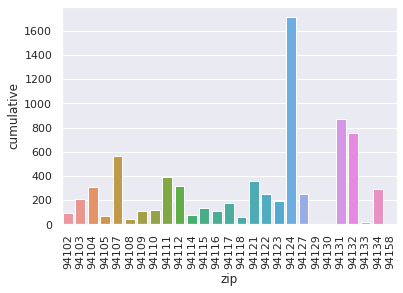

In [139]:
# Let's make a histogram

chart=sns.barplot(x=weights['zip'],y=weights['cumulative'],data=weights)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [134]:
import plotly.express as px

In [135]:
fig = px.bar(x=weights['zip'], y=weights['cumulative'], labels={'x':'zip code', 'y':'suitability score'})
fig.update_xaxes(range=[94100, 94135])
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()